# PCA另一個應用例子
## 高維度(9維)不好看不好分類，直接套PCA投影到2維
## 不解釋，直接看結果
- https://www.youtube.com/watch?v=BMzgoByHBCk&list=PL3MAPgqN8JWibnGlU8uCcVoY3toYx8aTz&index=81
- global.oup.com/uk/orc/biosciences/maths/currell/

Populating the interactive namespace from numpy and matplotlib
8.19344592173e-16
1.0
eigenvalue ratio = [ 0.38836289  0.28147082  0.11606089  0.10873467  0.04015909  0.02228813
  0.01817756  0.01574951  0.00899643] 


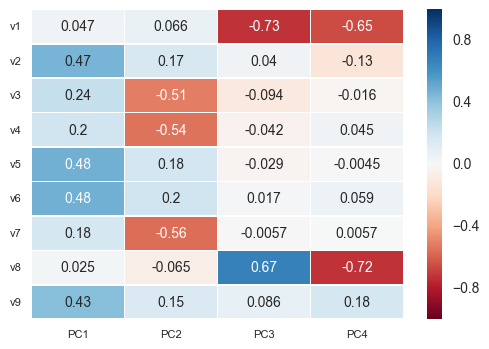

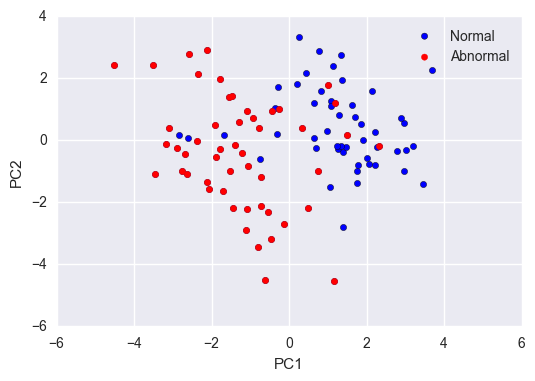

In [3]:
%pylab inline
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# loading data
df = pd.read_csv('ScreeningTest.csv')
df.head()

# feature transform
cols = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']
scaler = StandardScaler().fit(df[cols])
df_scaled = scaler.transform(df[cols])

print df_scaled[:, 0].mean()
print df_scaled[:, 0].std()

# pca
pca = PCA(n_components=9)
pca.fit(df_scaled)

print 'eigenvalue ratio = %s ' % (pca.explained_variance_ratio_)

# scores
pcscores = pd.DataFrame(pca.transform(df_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

# heatmap
loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]                  
ax = sns.heatmap(loadings.loc['PC1':'PC4', :].transpose(), center=0, linewidths=0.5, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)

plt.figure()
plt.scatter(pcscores.PC1, pcscores.PC2)
idx = df[df.Group == 'B'].index
plt.scatter(pcscores.PC1[idx], pcscores.PC2[idx], color='red')
plt.legend(['Normal', 'Abnormal'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()